In [ ]:
# Familiarize yourself with CIFAR-10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html. Use Keras to create and train a CNN to correctly label the image in the testing database.
# Undergraduate Students:
# Report on: data type (images? rgb?), number of classes, number of samples, each sample dimensions, training size, testing size.
# You can load the entire cifar10 DB by importing keras.datasets.cifar10
# If you go with this route you need to determine data types in x_train and x_test and how to make them fit your CNN.
# Typical CNN contains:
# one or more (convolutional +relu type activation+ pooling) layer
# followed by
# dense fully connected MLP with one or more hidden layers.
# Use only 2 or 3 convolutional layers, and 2 or 3 MLP layers.
# Each convolutional layer uses one or more filter.
# Use 2^k different filters in each layer (k=4-8 => 16-256 filters). 
# Each convolutional filter is odd size nxn
# Choose a training optimizer of adagrad or rmsprop.
# Use mini batch of 32-128.
# Apply dropout and regularization to your training.
# Use the real-time data augmentation.
# Finally show testing results after training (train no more than 300 epocs.)


# Graduate Students: In addition to the above do the following:
# For each of the following experiments run 10-20 epocs and observe the cost function.
# Determine the best setup based on the runs.
# Experiment with all convolutional layers having the same small filter size (e.g. 3x3)
# Experiment with all convolutional layers having the same large filter size (e.g. 15x15)
# Experiment with convolutional layers with increasing filter size (e.g. 3x3, 5x5, 7x7)
# Experiment with convolutional layers with decreasing filter size (e.g. 7x7, 5x5, 3x3)
# Experiment with 4 different optimizers including adagrad and rmsprop.
# Experiment with 4 different batch sizes.
# Experiment with L1 regularization, L2 regularization, dropout combination.
# Experiment with and without data augmentation.
# Generate a short report on based on the above experiment and upload it with your code . You can simply tabulate your results and provide a short analysis.
# Test your classifier using images from the web.
# Extra Credit:
# Build the CNN code from scratch using only numpy functions. This includes creating your own conv2d, maxpooling, relu, dense, softmax, forward propagation, and backward propagation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import datasets, layers, models, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adagrad, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


# 1) Data Analysis


---

*   Data type: RGB Colored Images
*   Number of classes: 10 classes -- airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
* Number of samples: 60,000
* Sample Dimension: 32x32
* Training/Test Size: 50,000 & 10,000


In [ ]:
# One-hot encode
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10, dtype="float32")
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10, dtype="float32")

# Normalize
x_train = x_train/255.0
x_test = x_test/255.0
print('done') # make sure I don't run this code multiple times and keep dividing the data

done


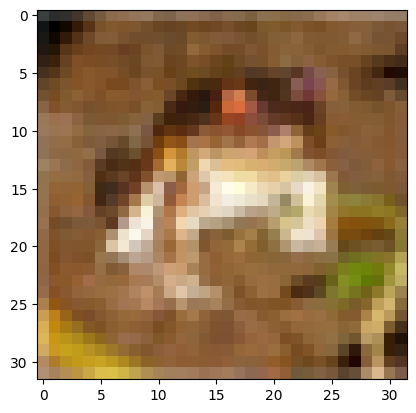

In [ ]:
y_train[0:10]
plt.imshow(x_train[0])
indices = random.sample(range(len(x_train)), 50000)
x_train = x_train[indices]
y_train = y_train[indices]

# 2) Convolutional Neural Network

In [ ]:
# One or more (convolutional +relu type activation+ pooling) layer
# Dense fully connected MLP with one or more hidden layers.
# Use only 2 or 3 convolutional layers, and 2 or 3 MLP layers.
# Each convolutional layer uses one or more filter.
# Use 2^k different filters in each layer (k=4-8 => 16-256 filters). 
# Each convolutional filter is odd size nxn
# Choose a training optimizer of adagrad or rmsprop.
# Use mini batch of 32-128.
# Apply dropout and regularization to your training.
# Use the real-time data augmentation.
# Finally show testing results after training (train no more than 300 epocs.)
# Define model

# Use the real-time data augmentation.
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range = 0.2)

model = Sequential()

# 3 Convolutional layers
# Each convolutional layer uses 2^k filters with nxn odd shape.
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# MLP layers
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))


# Choose a training optimizer of adagrad or rmsprop.
optimizer = Adagrad(learning_rate = 0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Train model with data augmentation
datagen.fit(x_train)
datagen.fit(x_test)
batch_size = 125
epochs = 50
CNN = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, steps_per_epoch=len(x_train) / batch_size, validation_split = 0.2)

model.summary()

Epoch 1/50
400/400 [==============================] - 130s 322ms/step - loss: 6.2092 - accuracy: 0.2962 - val_loss: 5.4097 - val_accuracy: 0.3720
Epoch 2/50
400/400 [==============================] - 118s 294ms/step - loss: 5.1015 - accuracy: 0.4034 - val_loss: 4.5349 - val_accuracy: 0.4957
Epoch 3/50
400/400 [==============================] - 117s 294ms/step - loss: 4.4540 - accuracy: 0.4494 - val_loss: 4.0198 - val_accuracy: 0.5357
Epoch 4/50
400/400 [==============================] - 121s 304ms/step - loss: 3.9803 - accuracy: 0.4848 - val_loss: 3.6391 - val_accuracy: 0.5424
Epoch 5/50
400/400 [==============================] - 116s 290ms/step - loss: 3.5929 - accuracy: 0.5164 - val_loss: 3.3138 - val_accuracy: 0.5664
Epoch 6/50
400/400 [==============================] - 119s 298ms/step - loss: 3.2751 - accuracy: 0.5419 - val_loss: 3.0510 - val_accuracy: 0.5832
Epoch 7/50
400/400 [==============================] - 121s 304ms/step - loss: 3.0192 - accuracy: 0.5629 - val_loss: 2.8375 -

400/400 [==============================] - 6s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 1.5948 - val_accuracy: 0.6743
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)

In [ ]:
# Evaluate model on test dataset
score = model.evaluate(x_test, y_test, batch_size=32)
Yhat = model.predict(x_test, batch_size=32)

In [ ]:
1# Plot Error
plt.subplot(211)
plt.title('Loss')
plt.plot(CNN.history['loss'], color='blue', label='Train')
plt.plot(CNN.history['val_loss'], color='orange', label='Validation')
plt.legend()

In [ ]:
# Plot Accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(CNN.history['accuracy'], color='blue', label='Train')
plt.plot(CNN.history['val_accuracy'], color='orange', label='Validation')
plt.legend()

# 3) Results

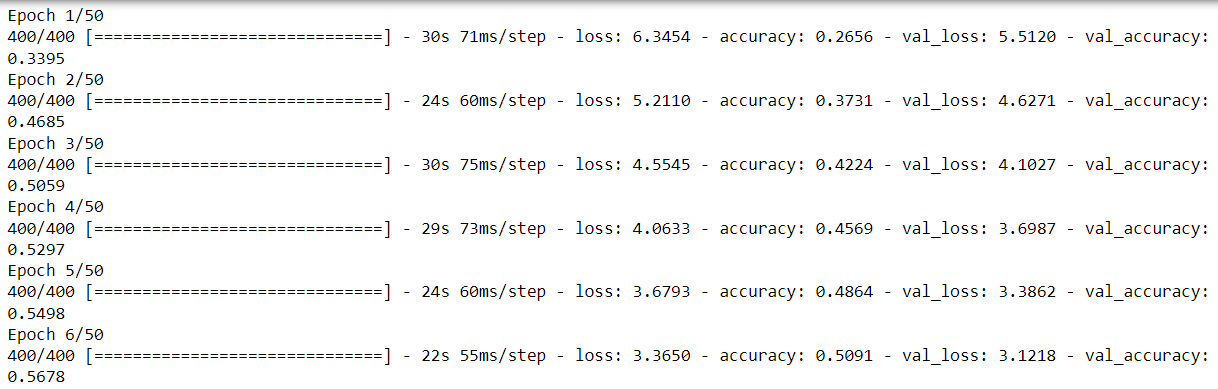

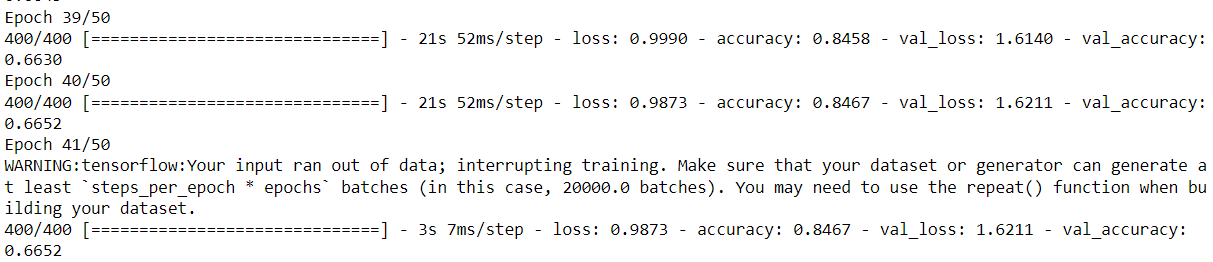

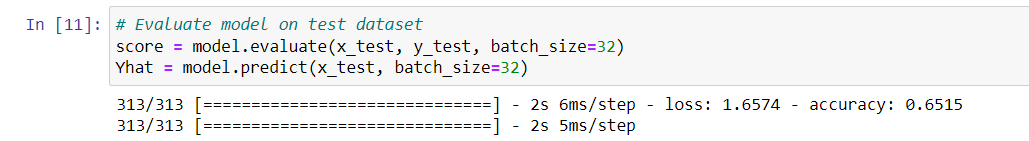

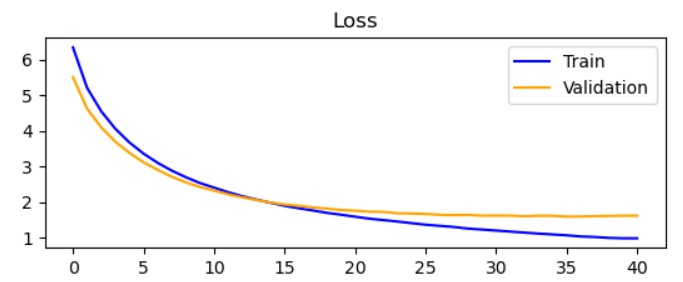

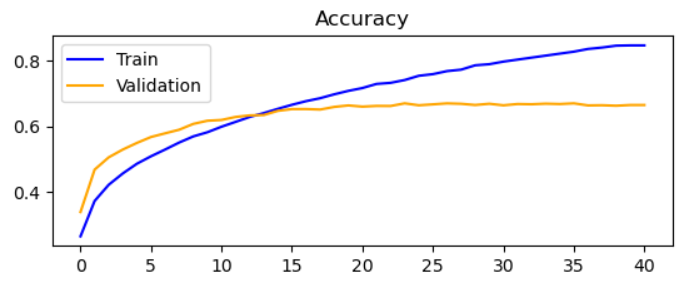

# 4) Analysis and Discussion



Note - The code crashes at large epochs in training depending on the samples size

Our testing/validation accuracy is about 15% to 20% lower than our training accuracy. Generally speaking, the validation/test split should be a bit lower, however this big of a gap does indicate some poblems. This is probably due to a wide variety of factors.



*   Overly complex model
*   Non-ideal hyperparameters
*   More regularization?
*   More dropout?
*   Lack of large enough sample size
*   Large validation split
*   Anything that leads to overfitting the train dataset
*   Etc.

Generally, these all make up the fact that the model is not as optimized for the smaller dataset. With the specified CNN model restrictions on our project, this is pretty hard to do. However, our train accuracy was still quite high, although we definitely overfitted for the given data, which did not translate as well to a different data set.


